<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Motivation" data-toc-modified-id="Project-Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Motivation</a></span></li><li><span><a href="#The-Dataset" data-toc-modified-id="The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Dataset</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Conclusion-and-Recommendations" data-toc-modified-id="Conclusion-and-Recommendations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion and Recommendations</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Project Motivation

## Business Objective

The Diabetes Prevention and Control Program centers on diabetes education for the public and professionals. The goals of the program are to:

* Prevent Type 2 diabetes in persons at high risk for developing the disease

* Prevent or delay the onset of Type 2 diabetes in persons with prediabetes, gestational diabetes and other risk factors

* Prevent or delay complications in persons with diabetes

* Assist persons who have diabetes in managing the disease and the complications that result if untreated

Participating in a diabetes self-management education (DSME) and support program can help manage diabetes, prevent complications, and reduce diabetes symptoms such as fatigue, pain, and depression. DSME and support programs provide knowledge, skills, and support to manage diabetes and prevent complications. Trained instructors conduct the classes and address the needs, goals, and life experiences of people with diabetes. These programs guide participants on healthy eating, active living and problem solving. Participants also learn how to monitor blood sugar, take medication, reduce risk for and/or manage other health conditions, and cope with diabetes. (1)

## Framing the problem

On the [2019 Spring Managed Care Organization Survey on Diabetes Self-Management Education and Support Services](https://www.dshs.texas.gov/txdiabetes/PDF/Diabetes--2019-Spring-Managed-Care-Organization-Survey.pdf), participants were asked about barriers they face implementing Diabetes Self-Management Education and Support (DSMES) services at their organizations. **Of the twelve respondents, nine said  that the biggest barrier is getting clients to engage with and comply with the DSMES program.** Therefore, an improvement on the way engagement and compliance with the DSMES program are managed is mandatory in order to fulfill the goals of the program.

## Proposed solution

As stated in the article [How to Increase Patient & Family Engagement in Healthcare](https://www.gethealthie.com/blog/how-to-increase-patient-family-engagement-in-healthcare), *"using a more relevant and data-driven approach will help patients feel confident in their progress, and propel them to continue working on their goals. Once your patients see their results forming, it will give them motivation and align them to stay determined and focused throughout their entire journey."*

Therefore, for the present project, we will introduce a predictive model, trained on features obtained from publicly available data about participants in the Austin Public Health's Diabetes Self-Management Education program. The goal of the model is to predict the likelihood of diabetes disease to be present on a patient. The target variable can have 2 possible values (Yes/No) indicating the presence of diabetes. Hence, this is a supervised, binary classification problem. To get the probabilities, we'll use algorithms than can output the predicted probability of that output.

**Predicting diabetes likelihood will allow us to create and deliver personalized and adequate content and set custom goals for the users. Also, it will enable tracking peoples progress and allocating resources according to their health condition.** This will let Diabetes Prevention and Control Program deliver a better service to their patients and thus fulfilling their business objective of assisting persons who have diabetes in managing the disease and the complications that result if untreated.

## Performance Measure

The proposed solutions relies on offering different content and assistance according to people's probability of having diabetes. This personalization it's the core to increase their engagement and fulfill the program strategic objective of assisting persons with diabetes.

Therefore, our model's performance measure need to check the goodness of a predicted probability score. Consequently, we are going to use Brier Score. The score summarizes the magnitude of the error in the probability forecasts and is designed for binary classification problems.

Brier score is very similar to the mean squared error, but only applied for prediction probability scores, whose values range between 0 and 1. The formula is:  

$$ Brier Score=1/N \sum \limits _{t=1} ^{N} (f_{t} ,- o_{t})^{2} $$

where:

* N: number of events (and, accordingly, predictions) under consideration
* t: indexes the events/predictions from 1 to  N  (the first event, the second event, etc.)
* ft: forecast (a probability from 0 to 1) for the tth event
* ot: outcome (0 or 1) of the tth event

Because it is a cost function, a lower Brier score indicates more accurate predictions while a higher Brier score indicates less accurate predictions. 

We can expect that the Brier score will be suitable with a balanced dataset and misleading when there is a large imbalance between the two classes. The average Brier score will present optimistic scores on an imbalanced dataset, rewarding small prediction values that reduce error on the majority class. In these cases, Brier score should be compared relative to the naive prediction (e.g. the base rate of the minority class or 0.1 in the above example) or normalized by the naive score. This latter example is common and is called the Brier Skill Score (BSS), whose formula is 

$$ BSS=1 - (BS / BSref) $$

where: 

* BS: is the Brier skill of model
* BSref: is the Brier skill of the naive prediction.

On this subject, we will decide which of the given performance metrics (Brier Score or Brier Skill Score) is suitable for the case following an initial exploration of the dataset.(2)(3)(4)

## Analysis Plan

The project will be developed according to the following steps:

* **Get the data**: first, we'll be downloading the dataset from Datacamp's GitHub repo

* **Create a test set**: afterwards we'll set aside part of the data, to evaluate our model predictive performance on a dataset that wasn't used for training, and thus preventing any data leakage.

* **Identify suitable performance metrics**: we'll analyze whether our target class is balanced or not, and decide on a performance metric accordingly

* **Exploratory data analysis**: explore the training set to identify data problems and discover any initial insights.

* **Prepare the data for machine learning algorithm**: at this point, and based on the information gained during exploratory analysis, we'll create the pipelines for data cleaning, handling numerical and categorical attributes, feature scaling, and any custom transformation.

* **Select and train a Model**: with our data cleaned, we'll select and appropriate machine learning algorithm and train it using cross validation techniques.

* **Fine-tune, evaluation and validation of the model**: finally, we shall fine-tune our model using grid search techniques and evaluate our model’s performance on the validation set and on a separate, unseen, test set.

# The Dataset

The data used in this project can be obtained from the [Diabetes Self-Management Repository](https://github.com/datacamp/careerhub-data/tree/master/Diabetes%20Self-Management). It contains information about participants in the Austin Public Health's Diabetes Self-Management Education program. 

The data consists of 20 input variables (this includes demographic information, diabetes status, and other health indicators) and one target variable with 2 possible values (Yes/No) indicating the presence of diabetes.

## Attribute Information - Features

|Title | Type  | Description |
|:-----------|:------|:------|
|Class | Categorical | (APH = Austin Public Health; ARCF = Abundant Rain Christian Fellowship; EB= El Buen Samaritano; PCHW = Promotores Community Health Workers)|                                 
|Class Language | Categorical | Language class was taught in |
|Age | Numerical | Age of participant |
|Year | Numerical | Year of class|
|Gender | Categorical | Gender of participant |
|Insurance Category | Categorical | Insurance type of participant|
|Medical Home Category | Categorical | Medical home of participant|
|Race/Ethnicity | Categorical | Race/ethnicity of participant|
|Education Level | Categorical | Education level of participant|
|Heart Disease (Yes/No) | Categorical | Heart disease diagnosis (yes/no)|
|High Blood Pressure (Yes/No) | Categorical | High blood pressure diagnosis (yes/no)|
|Tobacco Use (Yes/No) | Categorical | Tobacco user (yes/no)|
|Previous Diabetes Education (Yes/No) | Categorical | Previous diabetes education reported by participant (yes/no)|
|Diabetes Knowledge | Categorical | Self-reported knowledge of diabetes (poor/fair/good)|
|Fruits & Vegetable Consumption | Categorical | Fruits and/or vegetables eaten each week|
|Sugar-Sweetened Beverage Consumption | Categorical | Sugar-sweetened bevarages consumed each week|
|Food Measurement | Categorical | Number of times food was measured each week|
|Carbohydrate Counting | Categorical | Number of times carbohydrates were counted each week|
|Exercise | Categorical | Number of days participant exercised each week|
|Problem Area in Diabetes (PAID) Scale Score | Categorical | The PAID score is a measure of difficulty in managing ones diabetes. It ranges from 0-100, with higher scores indicating more problems.| 

## Attribute Information - Target

|Title | Type  | Description |
|:-----------|:------|:------|
|Diabetes Status (Yes/No) | Categorical | Diabetes status (yes/no) of participant

Note: attribute meta data obtained from [here](https://qri.cloud/open-data-archive/austin-austin-public-health-diabetes-self-management-education-participant-demographics-2015-2017).

# Analysis

## Getting the data

First, let's load our dataset.

In [1]:
# Import modules needed for importing and analysing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read raw data
df = pd.read_csv('https://raw.githubusercontent.com/datacamp/careerhub-data/master/Diabetes%20Self-Management/diabetes_self_management.csv')

## Create a test set

After checking that data was properly downloaded, let's divide the dataset into a test and train set. 

Let's begin by looking at our target variable, to spot any instances with missing or erroneous data on it.

In [3]:
# Look for missing values on target variable
df['Diabetes Status (Yes/No)'].isna().sum()

30

In [4]:
# Look for any erroneous data on target variable
df.groupby(['Diabetes Status (Yes/No)']).size()

Diabetes Status (Yes/No)
No         932
Unknown     14
Yes        712
dtype: int64

We can spot 30 instances with missing values on our target variable. Additionally, there are 14 instances with value 'Unknown', that in the context of our objective are comparable to a missing value. Since those instances won't be of use when training and testing our model as they reflect nothing about the presence of diabetes on a given person, and their number is not big enough to impute them using an unsupervised technique like knn, we are going to drop them.

In [5]:
# Drop rows with missing/unknown target value
df.drop(df[(df['Diabetes Status (Yes/No)'].isna()) | (df['Diabetes Status (Yes/No)']=='Unknown')].index,
        axis=0, inplace=True)

Having done that, we are going to randomly split our dataset to get 80% of the samples for training, and the remaining 20% for testing.

In [6]:
# Shuffle and split the data into train, validations sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [7]:
train_set.shape

(1315, 21)

In [8]:
test_set.shape

(329, 21)

## Identify suitable performance metrics

At this point, we'll like to know how balanced our dataset is. This will have a direct impact on the performance metrics we'll use. Then, let's take a look at the distribution of our target feature:

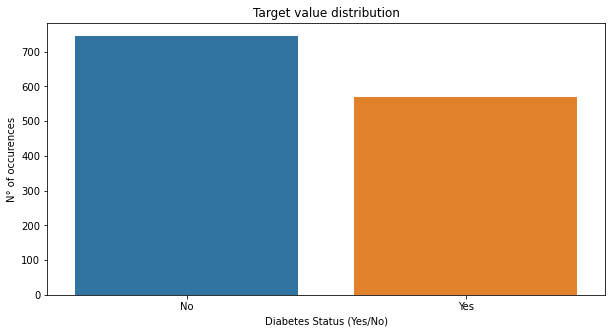

In [9]:
# Plot the distribution of the target feature
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=train_set, x='Diabetes Status (Yes/No)', order=['No', 'Yes'])
ax.set_ylabel('N° of occurences')
ax.set_title('Target value distribution')
plt.show()

In [10]:
# Measure target feature distibution in percent
print('Distribution, measured in percent, of the target class:\n')
train_set['Diabetes Status (Yes/No)'].value_counts(normalize=True).round(2)*100

Distribution, measured in percent, of the target class:



No     57.0
Yes    43.0
Name: Diabetes Status (Yes/No), dtype: float64

We can see that our data appears to be pretty balances (57% - 43%), so we can continue our analysis using the Brier Score.

## Exploratory Data Analysis

In this section, an initial exploratory analysis of the dataset will be done. We'll start with an exploration of numerical features, to continue later with categorical features. But first, let’s take a quick glimpse at the dataset structure:

In [11]:
# Glimpse at the dataset
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 844 to 1160
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Class                                        1315 non-null   object 
 1   Class Language                               1315 non-null   object 
 2   Age                                          1289 non-null   float64
 3   Year                                         1315 non-null   int64  
 4   Gender                                       1286 non-null   object 
 5   Insurance Category                           1231 non-null   object 
 6   Medical Home Category                        1248 non-null   object 
 7   Race/Ethnicity                               1289 non-null   object 
 8   Education Level                              1101 non-null   object 
 9   Diabetes Status (Yes/No)                     1315 non-null   object 
 10

Most of the features have missing values and categorical features are coded as object data type. We'll take care of this later, when preparing the data for the machine learning algorithm. 

### Exploration of the numerical features

In this section, we'll explore the 3 numerical features on the dataset.

In [12]:
# Describe numeric values
train_set.describe()

,Age,Year,Problem Area in Diabetes (PAID) Scale Score
count,1289.000000,1315.000000,507.000000
mean,49.142746,2016.048669,43.708087
std,15.283850,0.767929,27.793219
min,16.000000,2015.000000,0.000000
25%,37.000000,2015.000000,20.000000
50%,48.000000,2016.000000,40.000000
75%,60.000000,2017.000000,67.500000
max,91.000000,2017.000000,100.000000


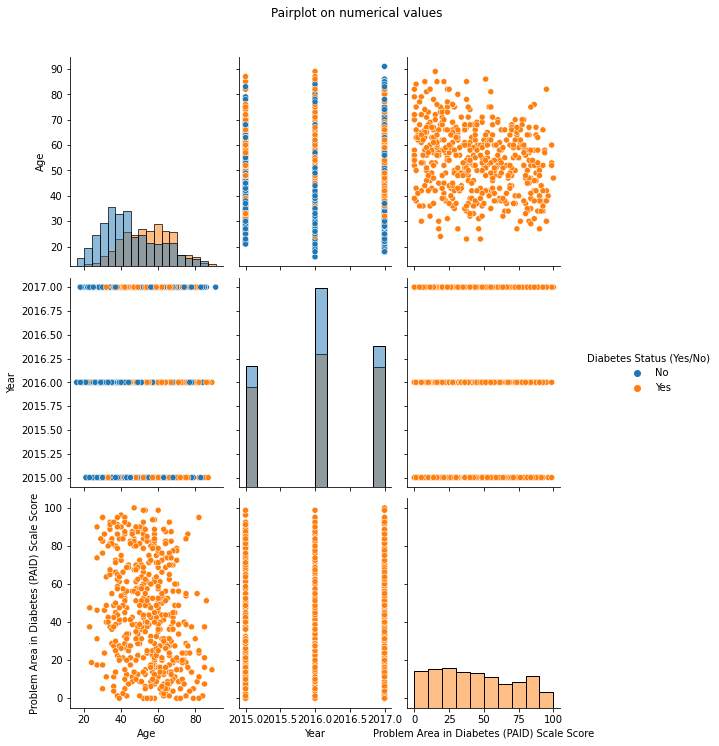

In [13]:
# Pairplot on numerical features, to identify relations on the data
g = sns.pairplot(train_set, diag_kind='hist', hue='Diabetes Status (Yes/No)', hue_order=['No', 'Yes'])
g.fig.set_size_inches(10,10)
g.fig.suptitle('Pairplot on numerical values', y =1.05)
plt.show()

From the table and plots above, we can conclude that:

* The Age feature appears to be a good predictor for Diabetes Status
* The PAID Scale Score is fulfilled only when the Diabetes Status is 'Yes'

### Exploration of the categorical features

In this section, we'll explore the 17 categorical features on the dataset.

In [14]:
# Describe the 'object' type columns from the data and check for nro of unique values and freq
train_set.describe(include=['O']).T

,count,unique,top,freq
Class,1315,4,APH,654
Class Language,1315,3,Spanish,791
Gender,1286,3,F,1051
Insurance Category,1231,6,None,354
Medical Home Category,1248,9,CommUnityCare,346
Race/Ethnicity,1289,7,Hispanic/Latino,875
Education Level,1101,6,1-8,287
Diabetes Status (Yes/No),1315,2,No,745
Heart Disease (Yes/No),1247,2,No,1157
High Blood Pressure (Yes/No),1255,2,No,812


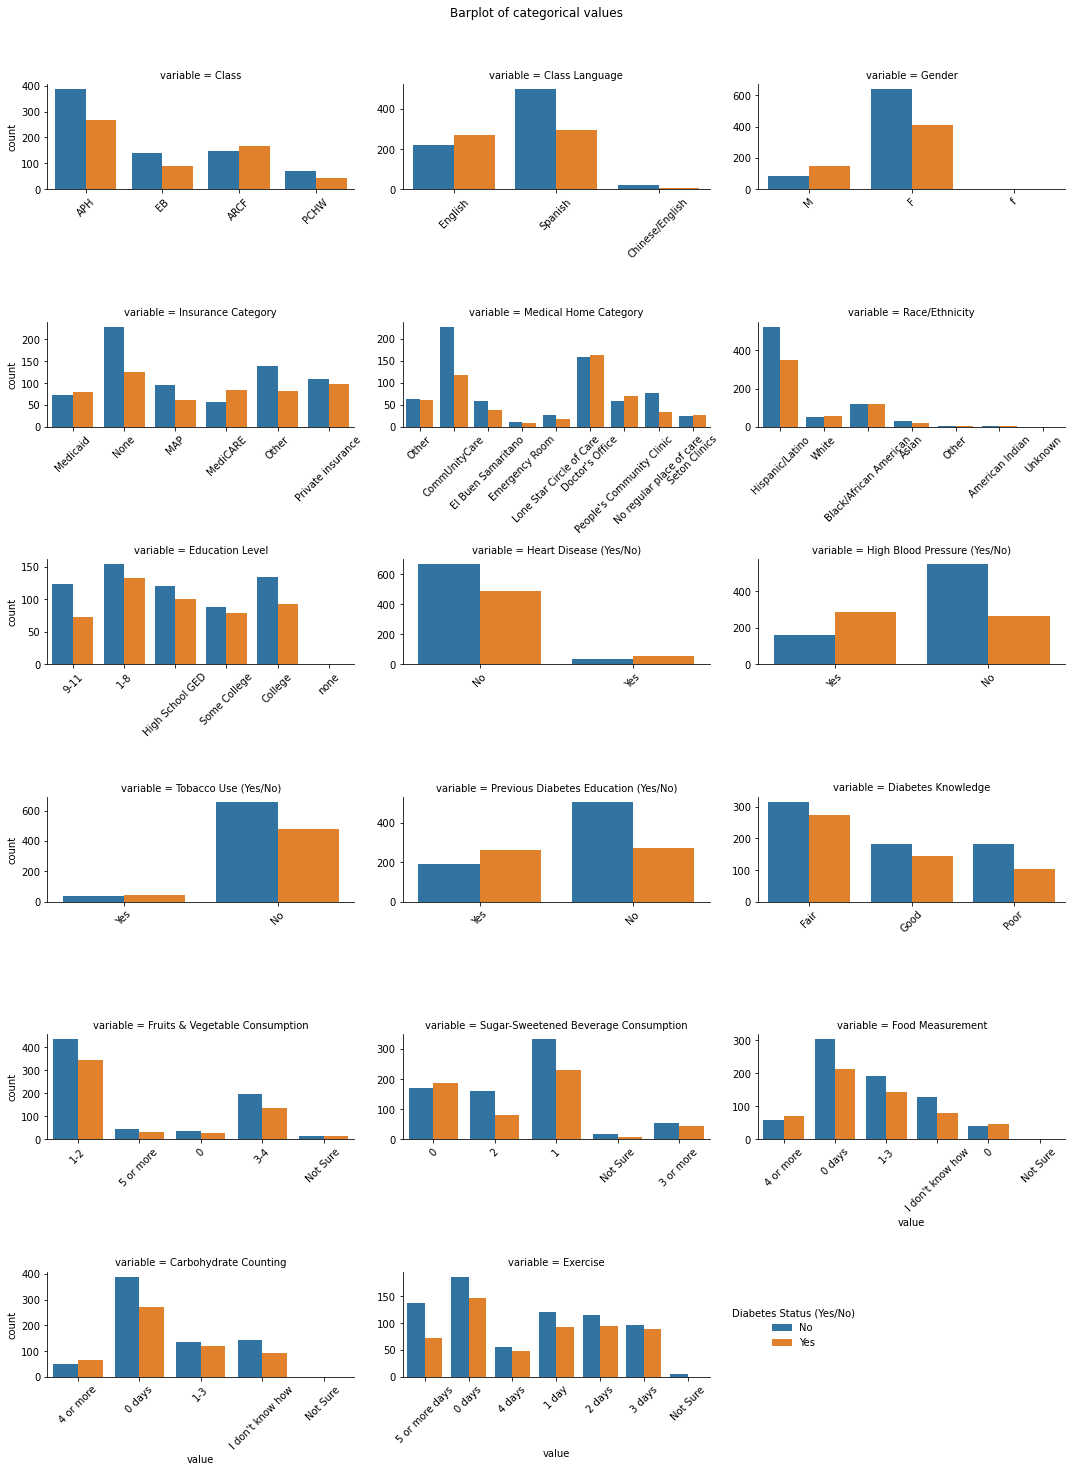

In [15]:
# Create data frame with categorical values only
cat_df = train_set.select_dtypes(include='object')

# Transform the categorical data frame into a longer format
cat_df = pd.melt(cat_df, id_vars='Diabetes Status (Yes/No)')

# Plot bar plot of every categorical variable, colored by our target variable
g = sns.catplot(x="value", col="variable", col_wrap=3, data=cat_df,sharex=False, sharey=False,
                kind="count", hue='Diabetes Status (Yes/No)', hue_order=['No', 'Yes'])

g.fig.set_size_inches(15,20)
g.set_xticklabels(rotation=45)
g._legend.set_bbox_to_anchor((0.8,0.1))
g.fig.suptitle('Barplot of categorical values', y =1.02)
plt.tight_layout()
plt.show()

From the table and plots above, we can conclude that:

* Categorical features on this dataset can be classified into:
    * Ordinal variables: variables with a particular order associated with them. We can spot such a characteristic in these variables:
        * Exercise
        * Carbohydrate Counting
        * Food Measurement
        * Sugar-Sweetened Beverage Consumption
        * Fruits and Vegetables Consumption
        * Diabetes Knowledge
        * Education Level
    * Nominal variables: variables that don't have any kind of order associated with them, such as:
        * Class
        * Class Languages
        * Insurance Category
        * Medical Home Category
        * Race/Ethnicity
    * Binary variables: they can have only two categories, such as:
        * Gender
        * Heart Disease
        * High blood pressure
        * Tobacco Use
        * Previous Diabetes Education
        
* Some categories present encoding errors (ex. female gender encoded with lower case)
* Some categories present levels with that correspond to very little instances (ex. American Indian Ethnicity)
* Most of the categories seem to be affected by the target feature.

### Exploratory Data Analysis summary

The dataset is small for machine learning standards, with only 1315 samples for training set. It also contains many data quality issues, mainly because of missing values and errors on category encoding. These issues will be treated on the following section.

Data values range are as expected by the metadata description, and no outliers was spotted.

The labels of the target are quiet balanced. Also, cross validation would be used to evaluate the model/s on the training set, to prevent overfitting.

## Prepare the data for machine learning algorithm

It's time for some data cleaning with the goal of preparing the data for the Machine Learning algorithms. The following transformation steps will be treated:

* Handling missing data
* Encoding categorical values 

For all the data transformation steps, we'll use the Pipeline class to help us with such sequences.

### Handling missing data

Let's recall the number of missing values per feature:

In [16]:
# Check for missing values
print("Count of missing values in each column of the dataset: ")
train_set.isna().sum()

Count of missing values in each column of the dataset: 


Class                                            0
Class Language                                   0
Age                                             26
Year                                             0
Gender                                          29
Insurance Category                              84
Medical Home Category                           67
Race/Ethnicity                                  26
Education Level                                214
Diabetes Status (Yes/No)                         0
Heart Disease (Yes/No)                          68
High Blood Pressure (Yes/No)                    60
Tobacco Use (Yes/No)                            96
Previous Diabetes Education (Yes/No)            85
Diabetes Knowledge                             112
Fruits & Vegetable Consumption                  33
Sugar-Sweetened Beverage Consumption            30
Food Measurement                                37
Carbohydrate Counting                           43
Exercise                       

We are going to adopt the following strategies to impute the missing values shown above:
    
* For categorical features with missing values: we'll use a strategy of imputing missing values as a constant, labeled 'missing'. This decision has been taken based on the assumption that users have left blank those features on purpose, probably because they didn't want to give that particular information.


* For numerical features with missing values:

    * Age: As it appeared to be a good indicator for predicting diabetes, and the number of missing values is little, then we are going to complete them using k-Nearest Neighbors, with k = 5.

    * Problem Area in Diabetes (PAID) Scale Score: during our exploratory analysis, we've saw that this feature was only fulfilled when the patient had diabetes. Recall that we aim to predict weather a patient has diabetes or no independently of a given diagnosis, and the  PAID Scale Score seems to be fulfilled after de diagnosis is confirmed. Therefore, we'll drop this feature from our model training.
    
    * Year: the feature will not be considered for training, as temporality is something we don't want to be considered in our model, given the established objectives.

### Encoding categorical values

During our exploratory phase, we discovered categorical features with encoding errors and/or levels with few instances. We also spotted that categorical variables on the dataset could be divided onto three groups: ordinal, nominal and binary features. Each of them will have a different treatment:

* Binary categories (Gender, Heart Disease, High blood pressure, Tobacco Use, Previous Diabetes Education): all of these variables are completed with "Yes" or "No", except "Gender" that it's coded as M or F. Regarding this last variable, we've spotted some data quality issues regarding the use of lower and upper cases. We'll fix this last issue first, converting all of the strings from "Gender" to upper cases. Let's also recall that on the previous step we've filled categorical missing values with the label 'missing'. Therefore, our binary categories, did turned up to have three possible values (Yes/No or M/F and missing). Hence, one hot encoding will be used.


* Ordinal categories (Exercise, Carbohydrate Counting, Food Measurement, Sugar-Sweetened Beverage Consumption, Fruits and Vegetables Consumption, Diabetes Knowledge, Education Level): as they have an implicit order on the information provided by them, they will be encoded ordinaly. Missing values and values thtat lack of information (ex. 'not sure') will be encoded with 0, followed by the categories expected in the features natural order


* Nominal categories (Class, Class Languages, Insurance Category, Medical Home Category, Race/Ethnicity): One hot encoding will be used.

### Preprocessing pipeline

Having stablished our roadmap, let's create our transformation pipeline.

In [17]:
# Import modules needed for creating pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


####### Ordinal Categorical Features ###############
# List column names of ordinal features
ordinal_attribs = ['Exercise', 'Carbohydrate Counting',
                   'Food Measurement', 'Sugar-Sweetened Beverage Consumption',
                   'Fruits & Vegetable Consumption', 'Diabetes Knowledge','Education Level']


# Categories expected in the ith column, sorted accordingly 
exercise_order = ['missing', '0 days', '1 day', '2 days', '3 days', '4 days', '5 or more days']
carbohydrate_counting_order =  ['missing','0 days', '1-3', '4 or more']
food_measurement_order = ['missing','0 days', '1-3', '4 or more']
sugar_consumption_order = ['missing','0 days', '1', '2', '3 or more']
fruits_consumption_order = ['missing', '0 days', '1-2', '3-4', '5 or more']
diabetes_knowledge_order = ['missing', 'Poor', 'Fair', 'Good']
education_level_order = ['missing', '1-8', '9-11', 'High School GED', 'Some College', 'College']

expected_orders = [exercise_order, carbohydrate_counting_order, food_measurement_order,
                   sugar_consumption_order, fruits_consumption_order, diabetes_knowledge_order,
                   education_level_order]

# Dict of values to replace 
ordinal_values_to_replace = {'none': 'missing', 'Not Sure': 'missing',
                             'I don\'t know how': 'missing', '0': '0 days'}

# Create a transformer that maps values to replace according to a dict specified by user
class ReplaceValues(BaseEstimator, TransformerMixin):
    def __init__(self, recode_dic):
        self.recode_dic = recode_dic
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        for recode in list(self.recode_dic.items()):
            X[X==recode[0]] = new=recode[1]
        return X
    
# Ignore warning regarding future version of Scikit-Learn modification on OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

# Create ordinal categorical features pipeline
ordinal_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('custom_transformer_wrong_values', ReplaceValues(recode_dic = ordinal_values_to_replace)),
    ('encoder', OrdinalEncoder(expected_orders))
     ])


####### Binary and Nominal Categorical Features ###############
# List column names of binary and nominal features
bin_nom_categorical = ['Gender', 'Heart Disease (Yes/No)', 'High Blood Pressure (Yes/No)',
                       'Tobacco Use (Yes/No)', 'Previous Diabetes Education (Yes/No)',
                       'Class', 'Class Language',  'Insurance Category',
                       'Medical Home Category', 'Race/Ethnicity']

# Dict of values to replace 
binary_values_to_replace = {'f': 'F', 'm': 'M'}

# Create binary and nominal categorical features pipeline
bin_nom_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('custom_transformer_wrong_values', ReplaceValues(recode_dic = binary_values_to_replace)),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
     ])


####### Numerical features #########################
# List column names of numerical features
numerical_attribs = ['Age']

# Create numerical features pipeline
numerical_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5))
])


####### Create transformation pipeline ###############
transformation_pipeline = ColumnTransformer([
    ('ordinal', ordinal_cat_pipeline, ordinal_attribs),
    ('binary_nominal', bin_nom_cat_pipeline, bin_nom_categorical),
    ('numerical', numerical_pipeline, numerical_attribs)
])


Now, we can apply our pipeline to the dataset, and create the objects that will be used during training and testing. On this behalf, our target variable will be recoded with integer, in such a way that people with Diabetes will be encoded with 1, and those that don't have the disease will be identified with 0.

In [18]:
# Transform datasets

X_train = transformation_pipeline.fit_transform(train_set.drop('Diabetes Status (Yes/No)', axis=1))
y_train = train_set['Diabetes Status (Yes/No)'].map({'Yes':1, 'No':0})

X_test = transformation_pipeline.transform(test_set.drop('Diabetes Status (Yes/No)', axis=1))
y_test = test_set['Diabetes Status (Yes/No)'].map({'Yes':1, 'No':0})

## Select and train a Model

### Model selection

Our problem requires that our model predicts accurate probabilities. However, we have to clearly assume that the Diabetes Self-Management Education Program, has to comply with certain standards and laws. Therefore, explainability of the model has to be considered. 

On this subject, there is a trade-off between models interpretability and explainability, and its prediction power. For this project we'll take a balance approach between those extremes, and will fit a random forest model. This algorithm, fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Random forest provide all the complexity of patter identification that ensemble models have, and provide the possibility of measure the importance of the features, allowing the user to gain insights on how the model it's working. They are also suitable for a mix of categorical and numerical features, as we have, and are insensitive to scaling of numerical features, which is good because preprocessing can introduce an extra source of variance.

### Training and fine-tuning

Brier score will be the metric choice to assess the performance of the classifier. As the dataset is small, we will make sure to evaluate the generalization performance of the models using a 10-fold cross-validation.

Fine tuning will be approached using grid search to find the best model hyper-parameters. On this behalf, the most important parameters of a random forest are:

* n_estimators: number of trees in the forest. More trees are better, since averaging more trees will lead to a more robust ensemble by reducing overfitting.


* max_depth: maximum depth of the tree.

In [19]:
# Import modules needed for training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import brier_score_loss

# Define the hyperparameter grid
param_grid = {'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50],
              'max_depth': [2, 5, 10, 15, 20, 25]}


# Initialize and fit GridSearchCV with 10-fold cross validation
rf = RandomForestClassifier(random_state=42)

gridsearch_rf = GridSearchCV(rf, param_grid, cv=10, 
                             scoring='neg_brier_score',
                             return_train_score=True)


# Fit the model
gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 10, 15, 20, 25],
                         'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50]},
             return_train_score=True, scoring='neg_brier_score')

In [20]:
# View best params
print('Best parameters found for our random forest model:\n\n', gridsearch_rf.best_params_)

Best parameters found for our random forest model:

 {'max_depth': 10, 'n_estimators': 40}


## Evaluation and validation of the model

### Analysis of cross validation folds

The grid search process determined that a random forest with 40 trees with a max depth of 10 achieved the best average brier score during testing on validation folds. 

Now, let's take a look on how the model performed during training. For that, we'll analyze how it performed compared to validation test sets created during cross validation process.

In [21]:
# Get scores from cross validation training 
cv_results = pd.DataFrame(gridsearch_rf.cv_results_)

# Select scores from the model with best parameters
best_cv_results = cv_results[(cv_results['param_max_depth'] == gridsearch_rf.best_params_['max_depth']) &
                             (cv_results['param_n_estimators'] == gridsearch_rf.best_params_['n_estimators'])]

In [22]:
# Select mean and std score on train and test
best_cv_results_summmary = best_cv_results[['mean_train_score', 'std_train_score', 
                                            'mean_test_score', 'std_test_score']].T


# Change mean sign as grid search uses "negative brier score"
best_cv_results_summmary.columns=['Score']
best_cv_results_summmary.loc[best_cv_results_summmary.index.str.contains('mean'), 'Score'] = best_cv_results_summmary['Score']*-1 

# Output result
print('\n10 fold Cross Validation Brier Score Summary:')
best_cv_results_summmary


10 fold Cross Validation Brier Score Summary:


,Score
mean_train_score,0.093608
std_train_score,0.002274
mean_test_score,0.193752
std_test_score,0.017027


[]

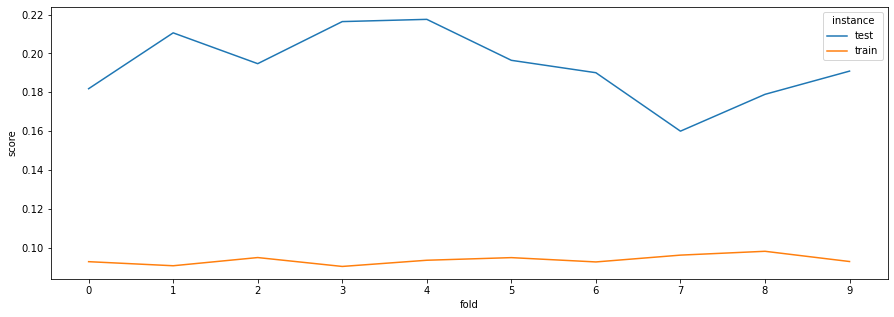

In [23]:
# Create data frame with train and test scores for each fold
fold_data = best_cv_results.T
fold_data = fold_data[fold_data.index.str.contains('split')].reset_index()
fold_data.columns = ['split', 'score']
fold_data['fold'] = fold_data['split'].str.extract('(\d+)')
fold_data['instance'] = fold_data['split'].str.split(pat='_',expand=True)[1]
fold_data= fold_data.convert_dtypes()
fold_data['score'] = fold_data['score']*-1 #Change mean sign as grid search uses "negative brier score"

# Plot data
fig = plt.subplots(figsize=(15,5))
sns.lineplot(x='fold', y='score', data=fold_data, hue='instance')
plt.plot()

As we can see, the model does seem to be overfitting the training set, situation that would explain the different scores measured on training and validation test sets (0.09 on average in training vs 0.19 on average in testing). 

Nonetheless, and considering that Brier Score always takes on a value between 0 (perfect accuracy) and 1 (perfect inaccuracy), an average score on validation testing set of 0.19 with a standard deviation of 0.01 does seem to be performing well, given the small size of the data set.

### Evaluating the model on the test set

After looking how the model performed on our validation set, let's evaluate it on an independent test set we've separated at the beginning of our project. Let's also remember that this test set was not used at any time during any phase of our work, not even the exploratory data analysis. Therefore, the evaluation on this test set it's a good estimation on how the model will performed in future, unseen data. 

In [24]:
# Order of the classes of the estimator
gridsearch_rf.best_estimator_.classes_

array([0, 1], dtype=int64)

In [25]:
# Create a data frame with the actual classes of the test set, and the predicted probabilities of our model
df_test = pd.DataFrame()
df_test['Target'] = y_test
df_test['prob_No'] = gridsearch_rf.best_estimator_.predict_proba(X_test)[:,0] 
df_test['prob_Yes'] = gridsearch_rf.best_estimator_.predict_proba(X_test)[:,1]

In [26]:
# Import module for evaluation
from sklearn.metrics import brier_score_loss

# Evaluate performance on test set
print("Brier Score on test set is:\n")
brier_score_loss(df_test['Target'], df_test['prob_Yes'])

Brier Score on test set is:



0.1892130140695992

As we can see, the model achieves a Brier Score of 0.189 on unseen test data, which is quite similar to the performance on validation sets. We can conclude that, given the short amount of data available, and the range that Brier Score has (0-1), the model is performing at acceptable rates, as we can spot on the following histogram:

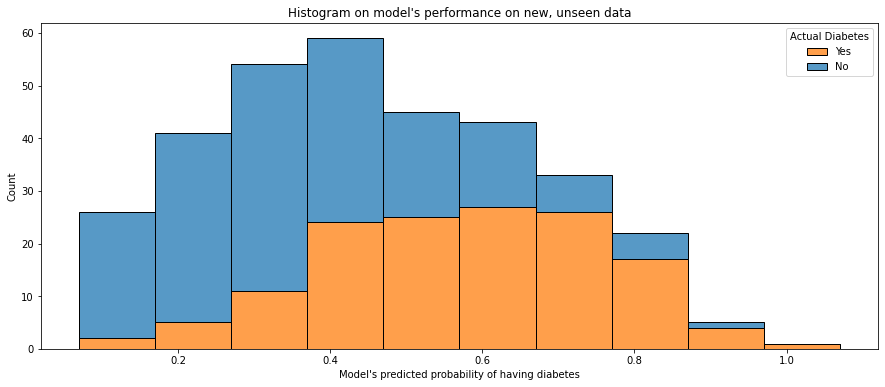

In [27]:
# Plot performance on test set
fig = plt.subplots(figsize=(15,6))
g = sns.histplot(data=df_test, x='prob_Yes', hue='Target',multiple="stack", binwidth=0.1, legend=False)
plt.title("Histogram on model's performance on new, unseen data")
plt.xlabel("Model's predicted probability of having diabetes")
plt.legend(title='Actual Diabetes', loc='upper right', labels=['Yes', 'No'])
plt.show(g)

### Feature importance

Finally, and as we've said when choosing the Random Forest model, an analysis of feature's importance can be done, to gain more insights on how the model work.

In [28]:
# Function for getting features names from the column transformer
# https://github.com/scikit-learn/scikit-learn/issues/12525
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

# Getting column names
col_names = get_column_names_from_ColumnTransformer(transformation_pipeline)

# Dictionary for one hot encoded features
one_hot_encoder_dict = {'x0': 'Gender', 'x1': 'Heart Disease (Yes/No)',
                        'x2': 'High Blood Pressure (Yes/No)',
                        'x3': 'Tobacco Use (Yes/No)','x4': 'Previous Diabetes Education (Yes/No)',
                        'x5': 'Class', 'x6': 'Class Language', 'x7': 'Insurance Category',
                        'x8': 'Medical Home Category', 'x9': 'Race/Ethnicity'}


# Recode columns names accordingly
col_names = pd.Series(col_names)
col_names = col_names.replace(one_hot_encoder_dict,regex=True)

In [29]:
# Generate feature importance series
importances_rf = pd.Series(gridsearch_rf.best_estimator_.feature_importances_, col_names)
importances_rf = importances_rf.sort_values(ascending=False)

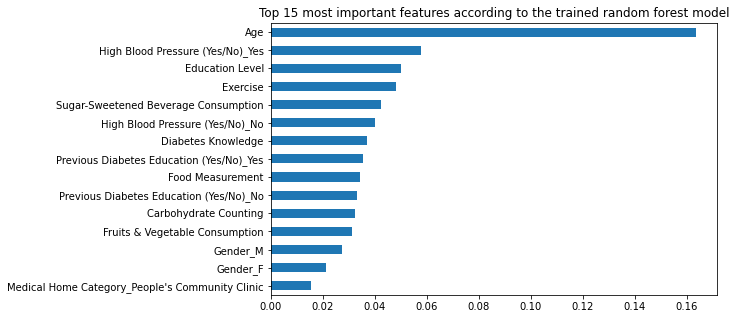

In [30]:
# Plot the impurity based feature importance of the 15 most relevant features
importances_rf = importances_rf[:15]
importances_rf.sort_values(ascending=True).plot(kind='barh', figsize=(8,5))
plt.title('Top 15 most important features according to the trained random forest model')
plt.show()

Having this kind of information is an enabler from the Diabetes Self-Management Program Managers to spot which are those features more related to diabetes development and act accordingly. Therefore, following  Pareto Principle (80% of consequences come from 20% of the causes), they can focus their efforts on an small amount of things with a bigger impact. 

For example, we can spot that age is quite related with the development of diabetes. With that information, they will be able to adjust their communication piezes according to an aged based segmentation. High blood presure and sugar-sweetened consumption are also high among the features importances, so they can focus their attention on developing and communicatin better diets. The same can be said for exercise, in which case different rutines can be elaborated. This are all examples that serve like an ilustration of possible outcomes that the our model facilitates for a better and bigger impact on bussiness targets.

# Conclusion and Recommendations

The project aimed to investigate the potential to develop a predictive model to predict the likelihood of developing diabetes. **The results from the model can be then used to help Diabetes Self-Management Education Program deliver personalized content and goals adequate to the user’s health status, tracking their progress and therefore improving their experience and engagement with the program.** Assistance to people with diabetes or tendency of developing the disease can be increased and experience with the program improved as:

* Content will be personalized according to their likelihood of developing the disease, giving people better understanding of their condition and relevant sources of information to deal or prevent it (food & exercise recommendations, etc.) This allows the program to deliver a distinctive coaching program to improve self-management and drive behavior change.

* Set goals and track their progress, both to engage and correct behavior when deviations arise (ex. when likelihood increases between two periods, send push notifications, reminders, etc.)

Using the available dataset, a random forest model was developed that achieved a Brier Score on the test set of 0.189, demonstrating potential to help us achieve our business goals. However, it does seem to be suffering from overfitting, so collecting more training data it's strongly advised. 

The importance of the features was determined using information extracted from the random forest model. The model showed that most important features for prediction are concentrated on a few groups, related with age and habits (exercise and type of foods consumption). This result can help reduce the cost associated with data collection by focusing efforts on these features. On this behalf, the dataset suffers some missing data issues, so this should be addressed when collecting new data. Also new type of measurements related to those features can be created, allowing us to explore them and gain more insights on them.

# References

 * [(1) Austin Public Health's Diabetes Self-Management Education program](https://www.dshs.texas.gov/txdiabetes)
 * [(2) What is a Brier score?](https://statisticaloddsandends.wordpress.com/2019/12/29/what-is-a-brier-score)
 * [(3) A Gentle Introduction to Probability Metrics for Imbalanced Classification](https://machinelearningmastery.com/probability-metrics-for-imbalanced-classification)
 * [(4) A Gentle Introduction to Probability Scoring Methods in Python](https://machinelearningmastery.com/how-to-score-probability-predictions-in-python)

 
 